# Imports


In [1]:
%load_ext autoreload
%autoreload 2
import os


while not os.getcwd().endswith("dynamic-clustering"):
    os.chdir("..")
    print(os.getcwd())

c:\Users\manse\OneDrive\Desktop\dynamic-clustering


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [3]:
umap_path = "./data/brightness_data/final_512d_brightness.csv"
umap_data = np.loadtxt(umap_path, delimiter=",")

embeddings_path= "./data/brightness_data/full_brightness_embeddings.csv"
embeddings_data = np.loadtxt(embeddings_path, delimiter=",")

In [4]:
print(f'umap shape: {umap_data.shape}')
print(f'embeddings shape: {embeddings_data.shape}')

umap shape: (2000, 512)
embeddings shape: (2000, 512)


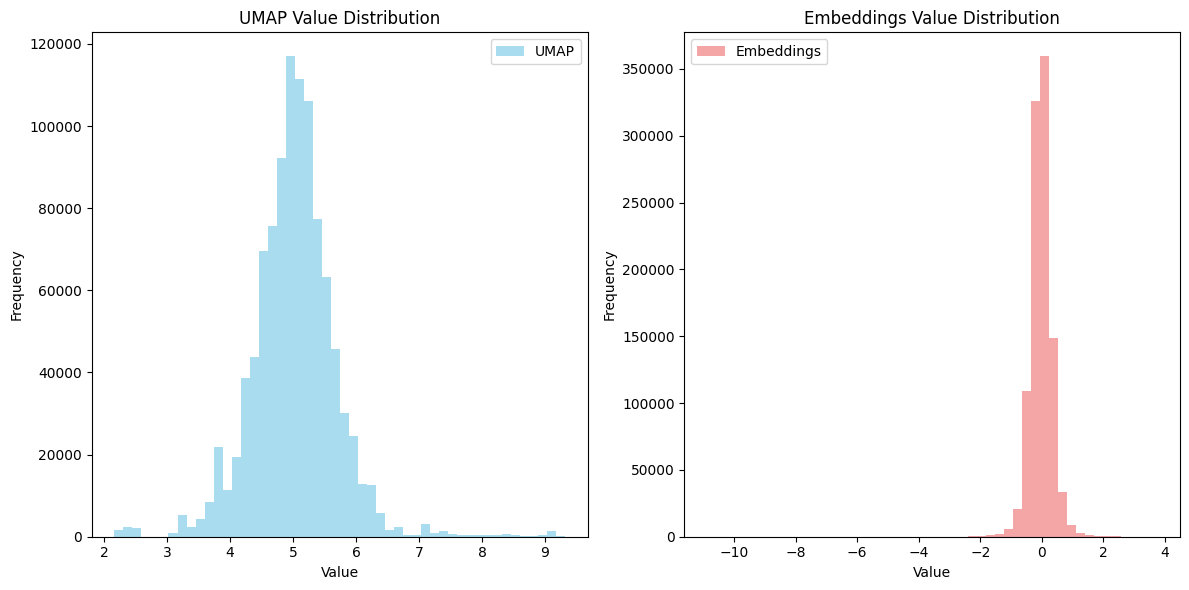

C:\Users\manse\AppData\Local\Temp\ipykernel_60132\888758915.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([umap_flat, embeddings_flat], labels=["UMAP", "Embeddings"])


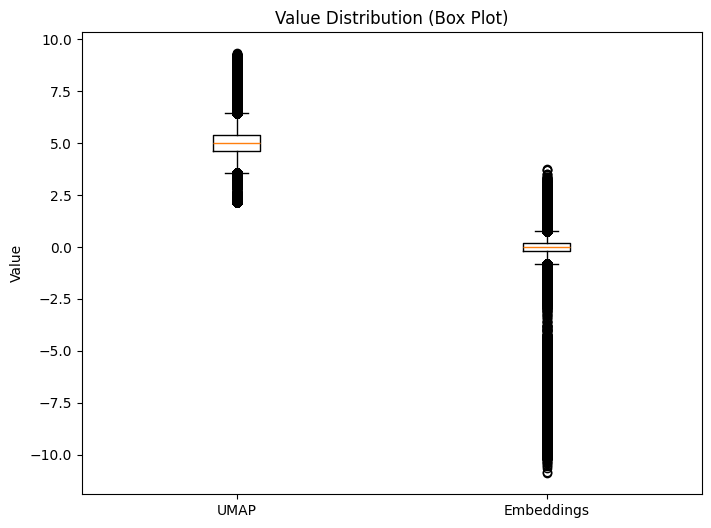

UMAP Statistics:
count    1.024000e+06
mean     5.015772e+00
std      6.846101e-01
min      2.161958e+00
25%      4.640339e+00
50%      5.018664e+00
75%      5.367241e+00
max      9.318887e+00
dtype: float64

Embeddings Statistics:
count    1.024000e+06
mean    -2.335482e-02
std      4.738017e-01
min     -1.088860e+01
25%     -2.121070e-01
50%     -1.443834e-02
75%      1.862632e-01
max      3.763686e+00
dtype: float64


In [5]:
# 1. Flatten the arrays (if you want to treat all values together):
umap_flat = umap_data.flatten()
embeddings_flat = embeddings_data.flatten()

# 2. Plotting the distributions:

# a. Histograms:
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.hist(umap_flat, bins=50, alpha=0.7, label="UMAP", color="skyblue")  # Adjust bins and alpha
plt.title("UMAP Value Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.hist(embeddings_flat, bins=50, alpha=0.7, label="Embeddings", color="lightcoral")
plt.title("Embeddings Value Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout() # Adjust subplot params so that subplots fit in to the figure area.
plt.show()

# c. Box Plots:
plt.figure(figsize=(8, 6))
plt.boxplot([umap_flat, embeddings_flat], labels=["UMAP", "Embeddings"])
plt.title("Value Distribution (Box Plot)")
plt.ylabel("Value")
plt.show()


# 3. Descriptive Statistics (for numerical comparison):
print("UMAP Statistics:")
print(pd.Series(umap_flat).describe())

print("\nEmbeddings Statistics:")
print(pd.Series(embeddings_flat).describe())

# Try to rescale the embeddings

In [6]:
# 1. Scale the embeddings data (0 to 10):
scaler = MinMaxScaler(feature_range=(0, 10))
embeddings_scaled = scaler.fit_transform(embeddings_data)

# 2. Flatten the scaled array for distribution plots:
embeddings_scaled_flat = embeddings_scaled.flatten()

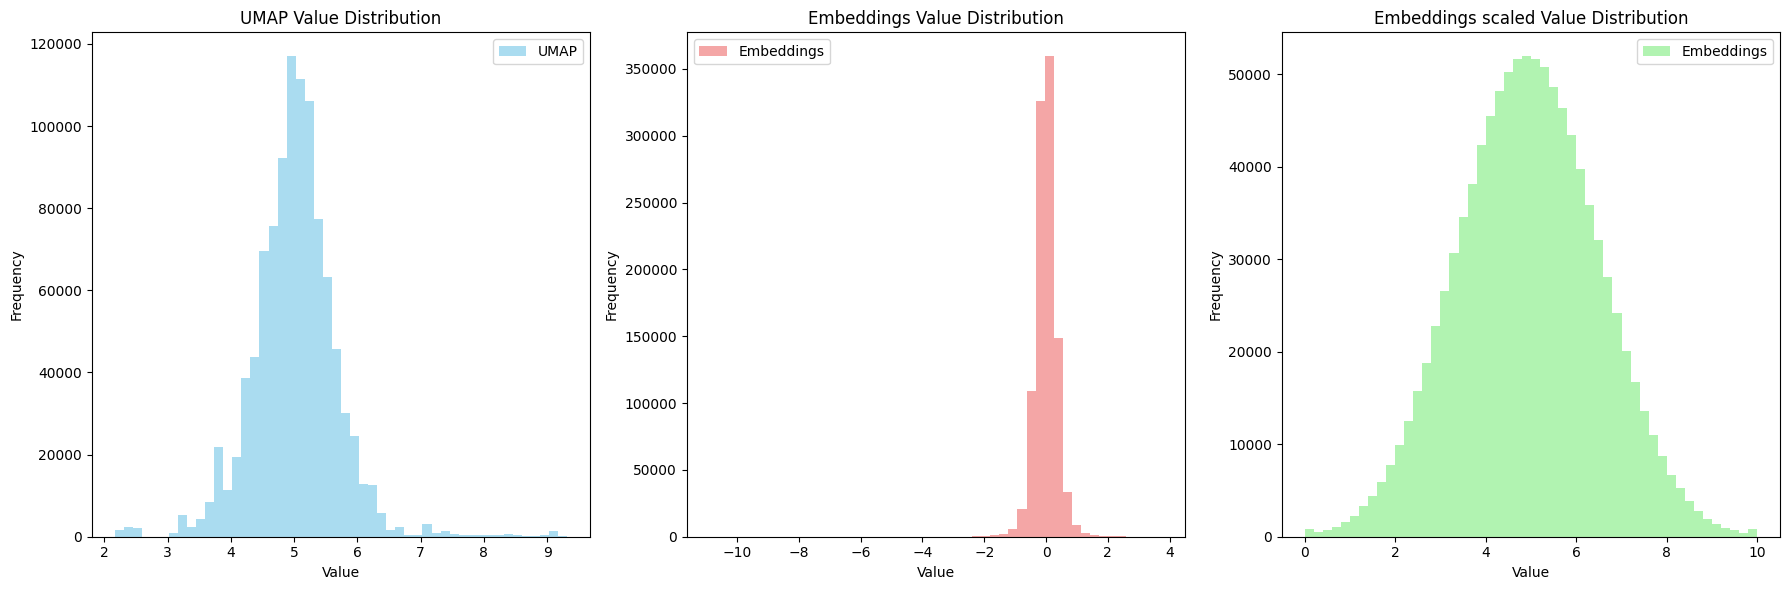

C:\Users\manse\AppData\Local\Temp\ipykernel_60132\4097275354.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([umap_flat, embeddings_flat, embeddings_scaled_flat], labels=["UMAP", "Embeddings", "Embeddings scaled"])


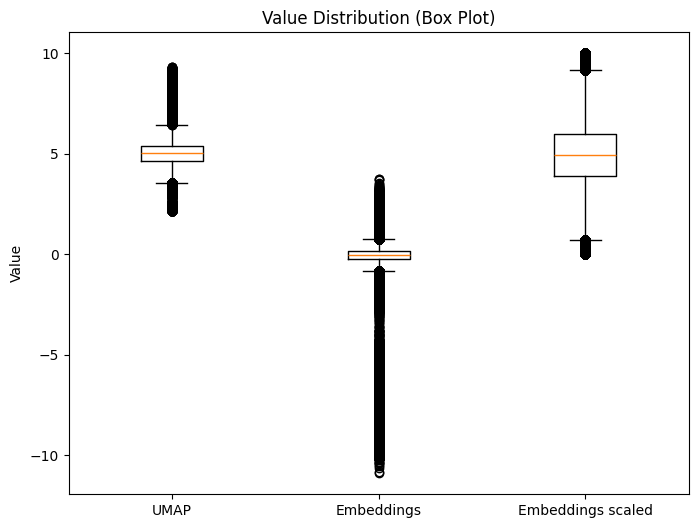

UMAP Statistics:
count    1.024000e+06
mean     5.015772e+00
std      6.846101e-01
min      2.161958e+00
25%      4.640339e+00
50%      5.018664e+00
75%      5.367241e+00
max      9.318887e+00
dtype: float64

Embeddings Statistics:
count    1.024000e+06
mean    -2.335482e-02
std      4.738017e-01
min     -1.088860e+01
25%     -2.121070e-01
50%     -1.443834e-02
75%      1.862632e-01
max      3.763686e+00
dtype: float64

Embeddings scaled Statistics:
count    1.024000e+06
mean     4.941904e+00
std      1.548092e+00
min      0.000000e+00
25%      3.885357e+00
50%      4.936718e+00
75%      5.994992e+00
max      1.000000e+01
dtype: float64


In [7]:
# a. Histograms:
plt.figure(figsize=(18, 6))  # Adjust figure size as needed

plt.subplot(1, 3, 1)  # 1 row, 2 columns, first plot
plt.hist(umap_flat, bins=50, alpha=0.7, label="UMAP", color="skyblue")  # Adjust bins and alpha
plt.title("UMAP Value Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1, 3, 2)  # 1 row, 2 columns, second plot
plt.hist(embeddings_flat, bins=50, alpha=0.7, label="Embeddings", color="lightcoral")
plt.title("Embeddings Value Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1, 3, 3)  # 1 row, 2 columns, second plot
plt.hist(embeddings_scaled_flat, bins=50, alpha=0.7, label="Embeddings", color="lightgreen")
plt.title("Embeddings scaled Value Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout() # Adjust subplot params so that subplots fit in to the figure area.
plt.show()

# c. Box Plots:
plt.figure(figsize=(8, 6))
plt.boxplot([umap_flat, embeddings_flat, embeddings_scaled_flat], labels=["UMAP", "Embeddings", "Embeddings scaled"])
plt.title("Value Distribution (Box Plot)")
plt.ylabel("Value")
plt.show()


# 3. Descriptive Statistics (for numerical comparison):
print("UMAP Statistics:")
print(pd.Series(umap_flat).describe())

print("\nEmbeddings Statistics:")
print(pd.Series(embeddings_flat).describe())

print("\nEmbeddings scaled Statistics:")
print(pd.Series(embeddings_scaled_flat).describe())

In [8]:
# output_path = "./data/scaled_embeddings.csv"  # Choose your desired output path and filename
# np.savetxt(output_path, embeddings_scaled, delimiter=",")

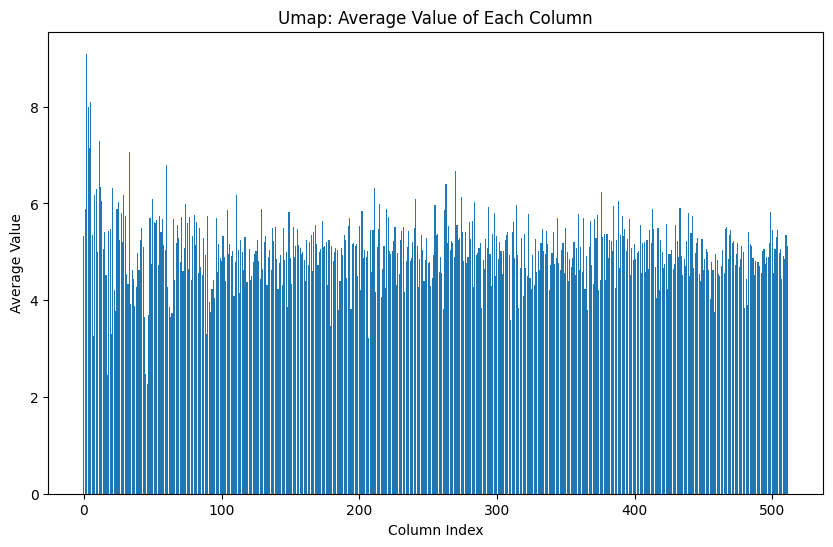

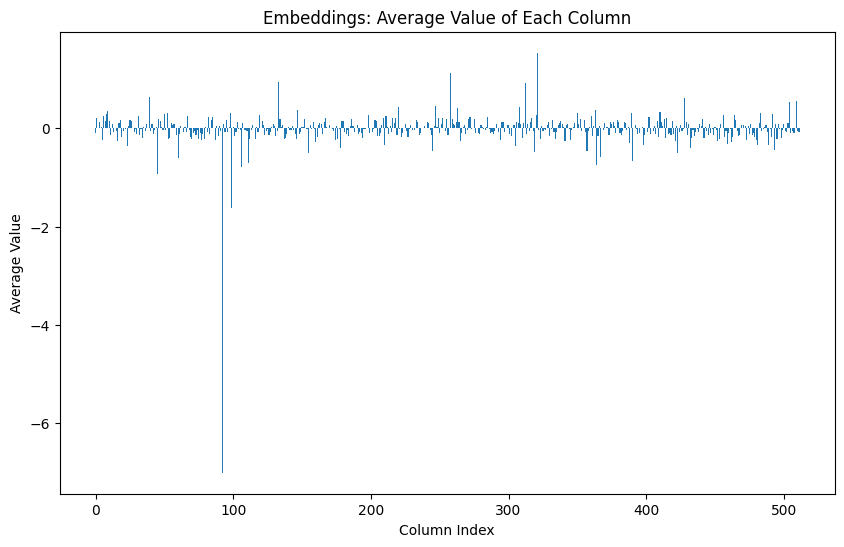

In [9]:
umap_average_columns = np.mean(umap_data, axis=0)
embeddings_average_columns = np.mean(embeddings_data, axis=0)

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(range(len(umap_average_columns)), umap_average_columns)

# Add labels and title
plt.xlabel("Column Index")
plt.ylabel("Average Value")
plt.title("Umap: Average Value of Each Column")

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(range(len(embeddings_average_columns)), embeddings_average_columns)

# Add labels and title
plt.xlabel("Column Index")
plt.ylabel("Average Value")
plt.title("Embeddings: Average Value of Each Column")

# Show the plot
plt.show()